# Sioux Falls

In [1]:
import os
from pprint import pp
import pandas as pd

import bcnetwork as bc

## Loading graph

In [2]:
data_dir = '../instances/sioux-falls/'
nodes_file = os.path.join(data_dir, 'nodes.csv')
arcs_file = os.path.join(data_dir, 'arcs.csv')
odpairs_file = os.path.join(data_dir, 'origin_destination.csv')

## Solve Sioux-Falls instance

The "official" instance consist of 22 pares origen-destino, tomado del paper "Bike network design problem with a path-size logit-based equilibrium constraint: Formulation, global optimization, and matheuristic".

The rest of the parameters that have to be set are:
- amount of infrastructures considering the base infrastructure.
- breakpoints: pairs of (improvement percentage, demand transfer percentage)
- budget: absolute amount or percentage of total buildable.

In [3]:
infrastructure_count = 4
breakpoints = [
    (0.95, 0.1),
    (0.87, 0.2),
    (0.85, 0.31),
    (0.80, 1.0),
]
budget_factor = 0.2

model = bc.model.Model(
    name='Sioux-Falls',
    nodes_file=nodes_file,
    arcs_file=arcs_file,
    odpairs_file=odpairs_file,
    infrastructure_count=infrastructure_count,
    breakpoints=breakpoints,
    budget_factor=budget_factor,
    project_root='..',
)

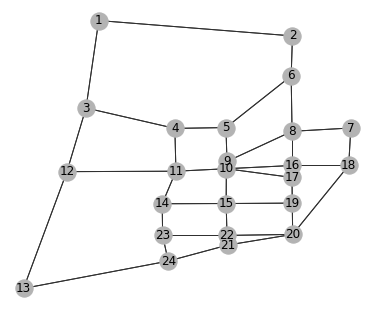

In [4]:
bc.draw.draw(model)

In [5]:
solution = model.solve()
solution.run_time_seconds

6.162899

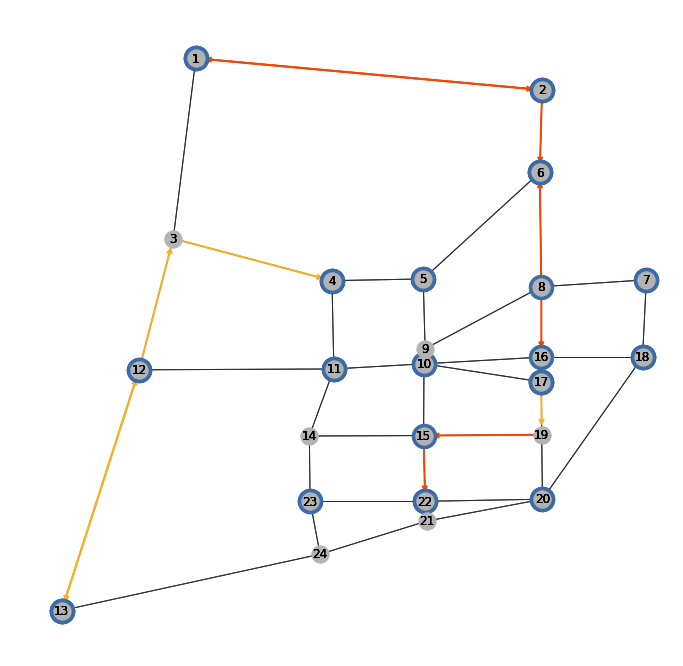

In [6]:
bc.draw.draw(model, solution=solution, figsize=(12, 12))